# **Import Libraries and modules**

###Third Revision:</br>
###Updates:</br>
* Increasing Epochs to 30</br>
* Introducing Dropouts</br>
* Introduce Valiadation Accruacy for every epoch</br>
###Summary:</br>
Accuracy increased to 99.31</br>
No.of Epochs 30</br>
Batch size = 32


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


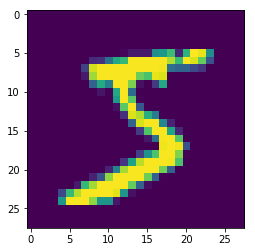

In [65]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [68]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [70]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
from keras.layers import Activation, MaxPooling2D,BatchNormalization,Dropout
from keras.optimizers import Adam
model = Sequential() 

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False,name='layer1'))#......26......rf3....
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer2'))#......24......rf5....
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False,name='layer3'))#......22......rf7....
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1 ,1, activation='relu',use_bias=False,name='layer5'))#......11......rf14....

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer6'))#......9......rf16....
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False,name='layer7'))#......7......rf18....
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', use_bias=False,name='final'))
model.add(Convolution2D(10, 7, 7,use_bias=False,name='layer8'))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False, name="layer1")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False, name="layer2")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, name="layer3")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False, name="layer5")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_15 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 24, 24, 16)        1440      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_16 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
layer3 (Conv2D)              (None, 22, 22, 32)        4608      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, name="layer7")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False, name="final")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (7, 7), use_bias=False, name="layer8")`


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [73]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 387us/step - loss: 0.1732 - acc: 0.9450 - val_loss: 0.0507 - val_acc: 0.9841
Epoch 2/30
60000/60000 [==============================] - 20s 328us/step - loss: 0.0589 - acc: 0.9812 - val_loss: 0.0493 - val_acc: 0.9851
Epoch 3/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0466 - acc: 0.9853 - val_loss: 0.0395 - val_acc: 0.9872
Epoch 4/30
60000/60000 [==============================] - 19s 314us/step - loss: 0.0399 - acc: 0.9876 - val_loss: 0.0384 - val_acc: 0.9868
Epoch 5/30
60000/60000 [==============================] - 20s 328us/step - loss: 0.0353 - acc: 0.9888 - val_loss: 0.0343 - val_acc: 0.9885
Epoch 6/30
60000/60000 [==============================] - 19s 320us/step - loss: 0.0318 - acc: 0.9898 - val_loss: 0.0302 - val_acc: 0.9901
Epoch 7/30
60000/60000 [==============================] - 20s 331us/step - loss: 0.0303 - acc: 0.9902 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [75]:
print(score)

[0.020700751633395065, 0.9931]


In [0]:
y_pred = model.predict(X_test)

In [77]:
print(y_pred[:9])
print(y_test[:9])

[[2.8054123e-16 2.4232881e-12 8.6613527e-10 3.5297853e-07 2.6515322e-18
  3.0160662e-16 4.5977710e-26 9.9999964e-01 2.2231796e-15 8.0560109e-10]
 [1.2514083e-08 3.8720653e-08 1.0000000e+00 3.6073222e-13 8.0559628e-11
  1.6278791e-15 3.4541603e-09 5.9695619e-13 3.1515731e-11 9.5662359e-15]
 [2.4240762e-10 9.9999952e-01 3.3906913e-09 4.9790970e-12 2.6323002e-07
  4.0825499e-09 5.7958999e-10 1.9665573e-07 3.5529002e-08 6.2353767e-09]
 [9.9999881e-01 6.2862769e-17 1.8699739e-10 3.4160845e-12 1.1036251e-09
  2.6141694e-10 8.2223761e-07 1.9442937e-11 2.9343181e-09 3.1097770e-07]
 [2.0590846e-13 1.2753149e-16 2.7228615e-11 4.3528379e-15 9.9999905e-01
  2.2573106e-14 9.5238663e-14 1.3182377e-11 3.0270784e-12 9.7550173e-07]
 [1.8227932e-09 9.9999845e-01 6.1587189e-09 1.8145206e-12 3.5675561e-07
  3.7663112e-11 5.9007091e-11 1.1104465e-06 6.5745333e-08 1.2028324e-08]
 [6.0347450e-25 4.0745779e-13 2.0100032e-13 1.1159189e-19 1.0000000e+00
  4.1257162e-16 1.1095438e-18 1.7638322e-09 2.8939580e-09 

32


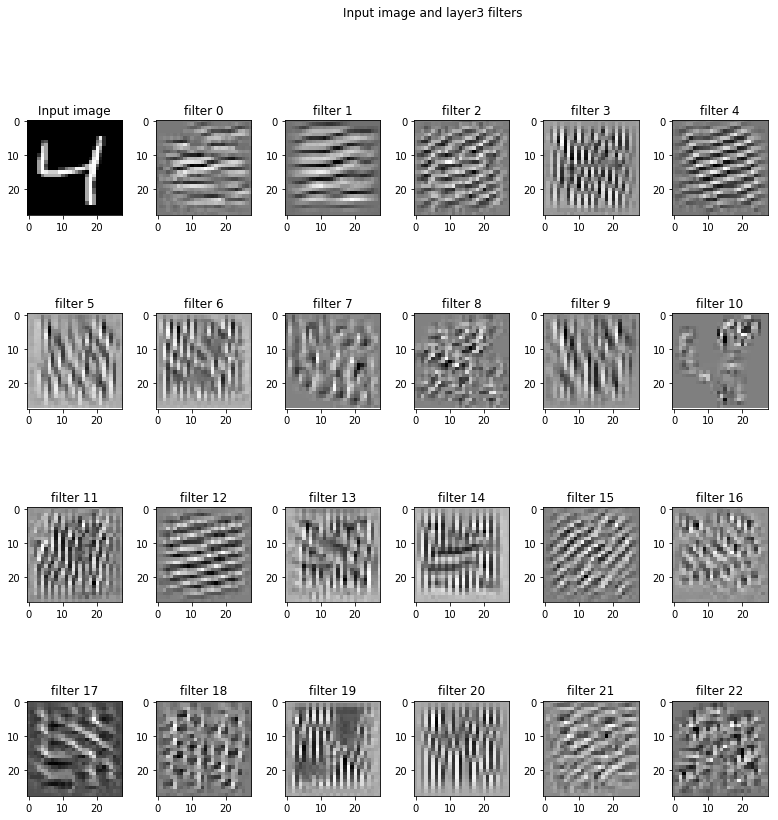

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(layer_name,img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print(layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x,plot_y, figsize = (12, 12))
    reshape = img.reshape((28, 28))
    ax[0, 0].imshow(reshape, cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name= 'layer3')

16


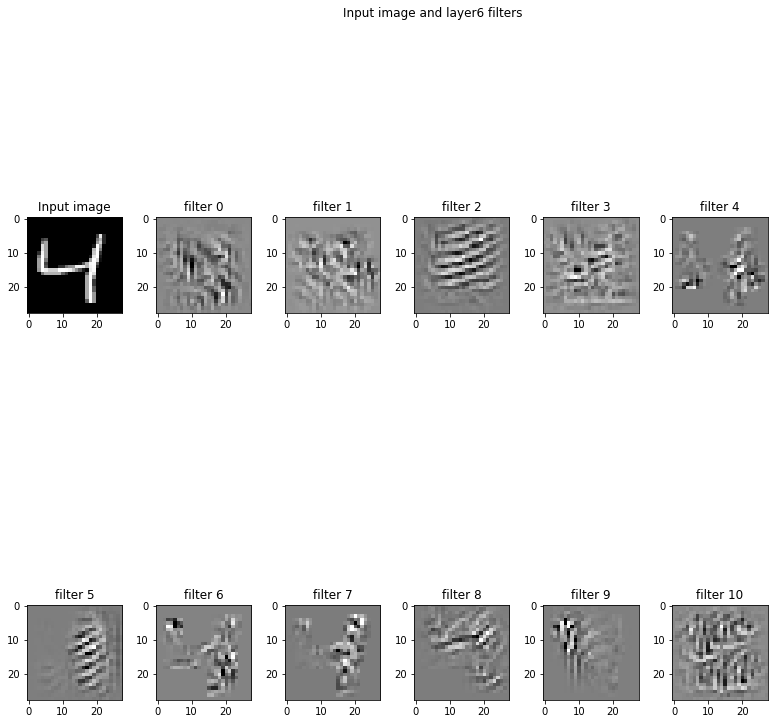

In [79]:
vis_img_in_filter(layer_name= 'layer6')

In [80]:
vis_img_in_filter(layer_name= 'layer10')

KeyError: ignored